In [1]:
import fireducks.pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gzip

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [ ]:
dataset_file = "../k6_producer/results/test04/stress_edge.csv"
# with gzip.open(dataset_file, "rb") as f:
#     df = pd.read_csv(f)
df = pd.read_csv(dataset_file)
print(f"Loaded {len(df)} records from {dataset_file}")
df.head()

: 

In [ ]:
df["metric_name"].unique()

array(['vus', 'vus_max', 'data_sent', 'data_received',
       'kafka_writer_write_count', 'kafka_writer_message_count',
       'kafka_writer_message_bytes', 'kafka_writer_error_count',
       'kafka_writer_batch_seconds', 'kafka_writer_batch_queue_seconds',
       'kafka_writer_write_seconds', 'kafka_writer_wait_seconds',
       'kafka_writer_retries_count', 'kafka_writer_batch_size',
       'kafka_writer_batch_bytes', 'kafka_writer_attempts_max',
       'kafka_writer_batch_max', 'kafka_writer_batch_timeout',
       'kafka_writer_read_timeout', 'kafka_writer_write_timeout',
       'kafka_writer_acks_required', 'kafka_writer_async',
       'iteration_duration', 'iterations', 'dropped_iterations'],
      dtype=object)

In [4]:
df[df["metric_name"]=="kafka_writer_error_count"]["metric_value"].sum()

np.float64(0.0)

In [5]:
df[df["metric_name"]=="kafka_writer_retries_count"]["metric_value"].sum()

np.float64(0.0)

<Axes: ylabel='Frequency'>

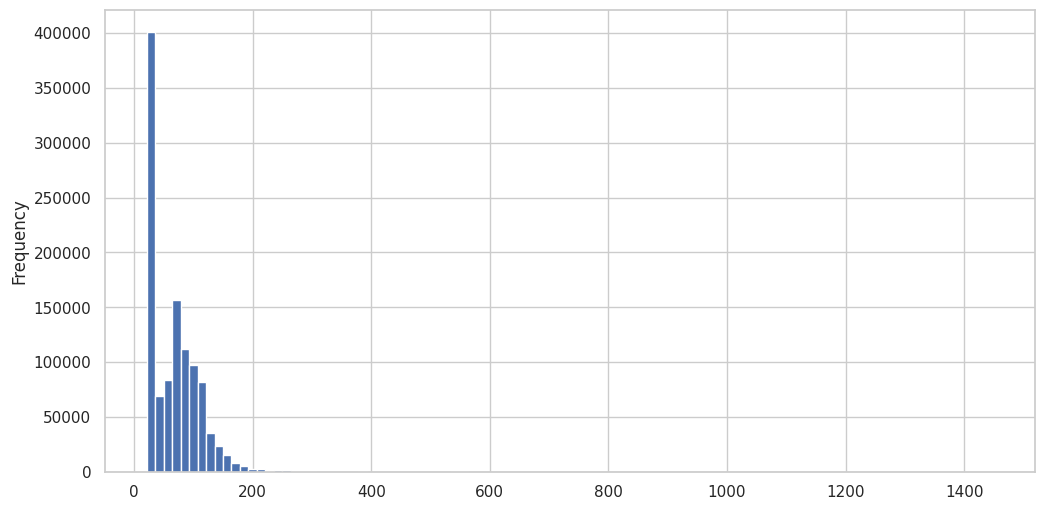

In [6]:
df[df["metric_name"]=="iteration_duration"]["metric_value"].plot.hist(bins=100)

[Text(0.5, 1.0, 'ACK Latency'), Text(0, 0.5, 'ACK Latency (ms)')]

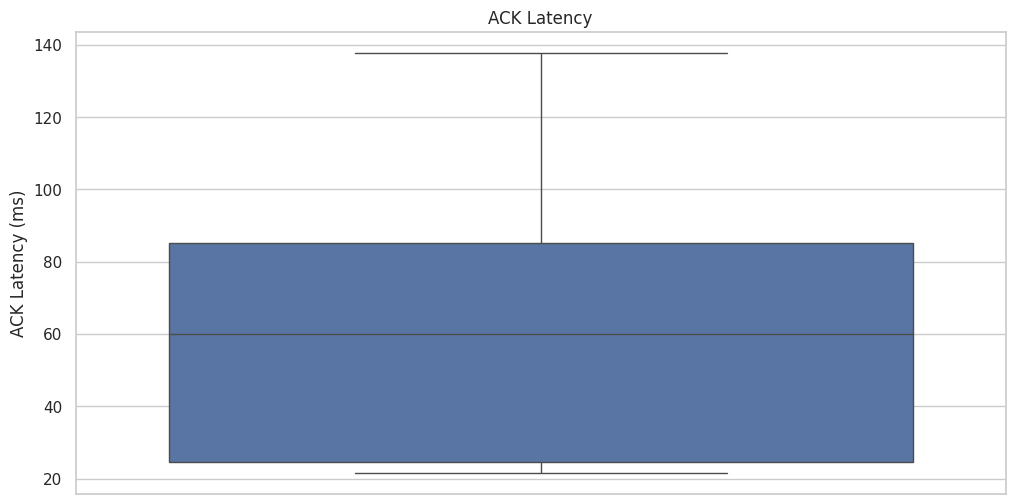

In [7]:
import seaborn as sns

ack_latency = df[df["metric_name"] == "kafka_writer_write_seconds"]["metric_value"]

sns.boxplot(ack_latency[ack_latency < ack_latency.quantile(0.95)]).set(
    title="ACK Latency", ylabel="ACK Latency (ms)"
)

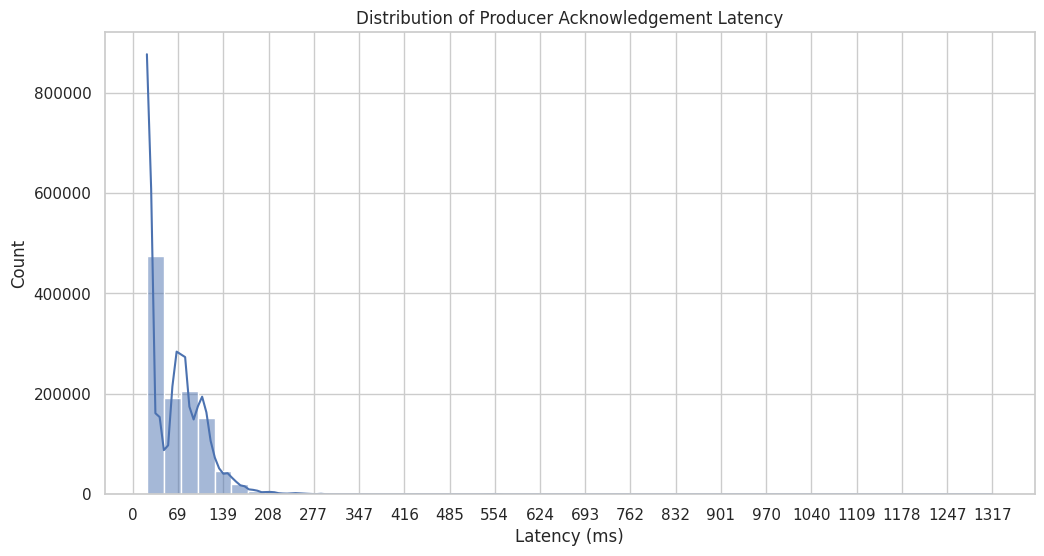

In [13]:
import numpy as np

plt.figure(figsize=(12, 6))
sns.histplot(data=ack_latency["metric_value"], kde=True, bins=50)
plt.title("Distribution of Producer Acknowledgement Latency")
plt.xlabel("Latency (ms)")
plt.ylabel("Count")
plt.xticks(np.linspace(0, ack_latency["metric_value"].max(), 20))
plt.show()

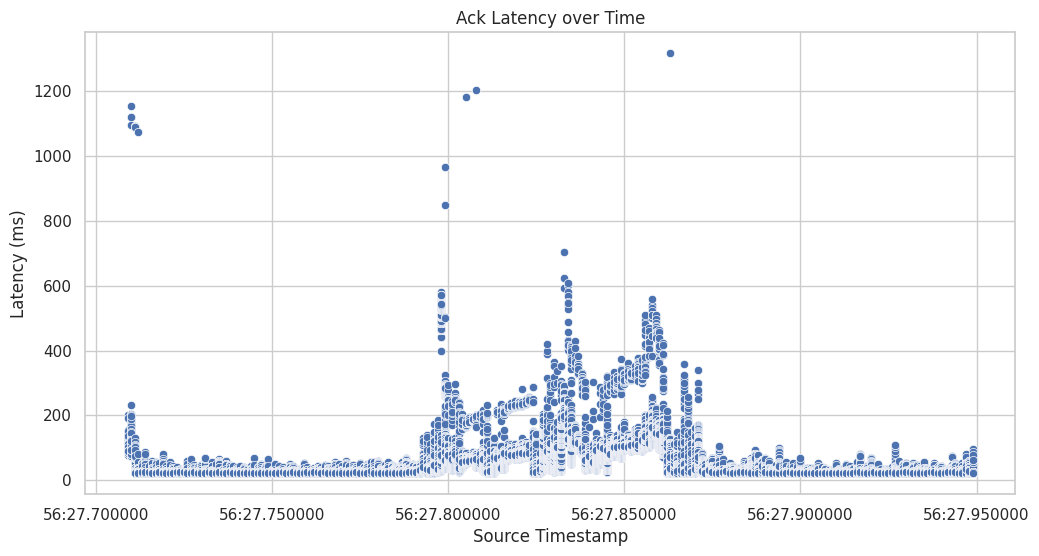

In [14]:
# Convert source_timestamp to datetime
try:
    ack_latency = df[df["metric_name"] == "kafka_writer_write_seconds"].copy()
    ack_latency['timestamp_dt'] = pd.to_datetime(pd.to_numeric(ack_latency['timestamp']), unit='ms')
except Exception as e:
    print(f"Could not parse timestamp: {e}")

plt.figure(figsize=(12, 6))
sns.scatterplot(data=ack_latency, x="timestamp_dt", y="metric_value", legend=True)
plt.title("Ack Latency over Time")
plt.xlabel("Source Timestamp")
plt.ylabel("Latency (ms)")
plt.show()

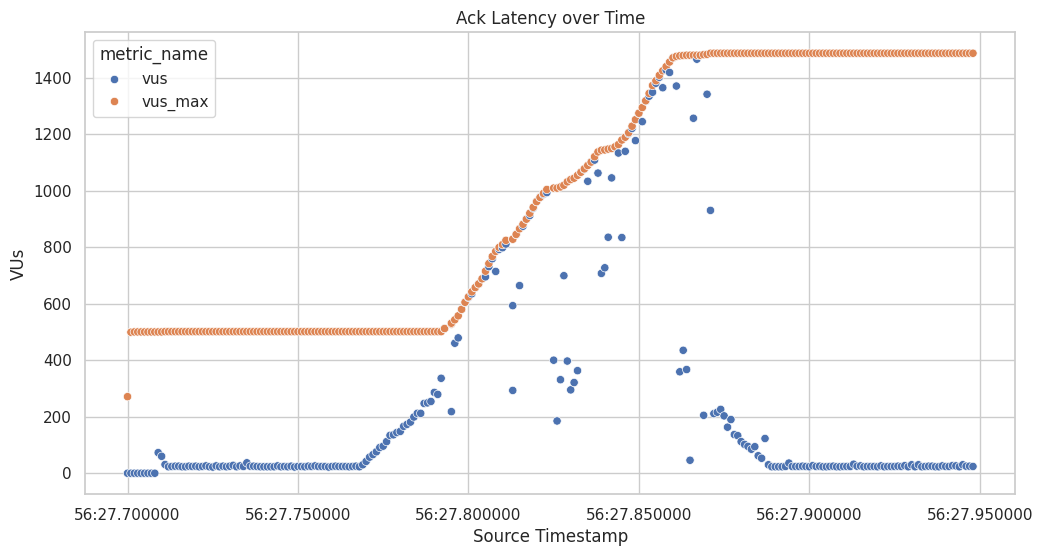

In [20]:
# Convert source_timestamp to datetime
try:
    vus = df[(df["metric_name"] == "vus_max") | (df["metric_name"] == "vus")].copy()
    vus['timestamp_dt'] = pd.to_datetime(pd.to_numeric(vus['timestamp']), unit='ms')
except Exception as e:
    print(f"Could not parse timestamp: {e}")

plt.figure(figsize=(12, 6))
sns.scatterplot(data=vus, x="timestamp_dt", y="metric_value", hue="metric_name", legend=True)
plt.title("Ack Latency over Time")
plt.xlabel("Source Timestamp")
plt.ylabel("VUs")
plt.show()

/home/arthur/dev/streaming-pipeline/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


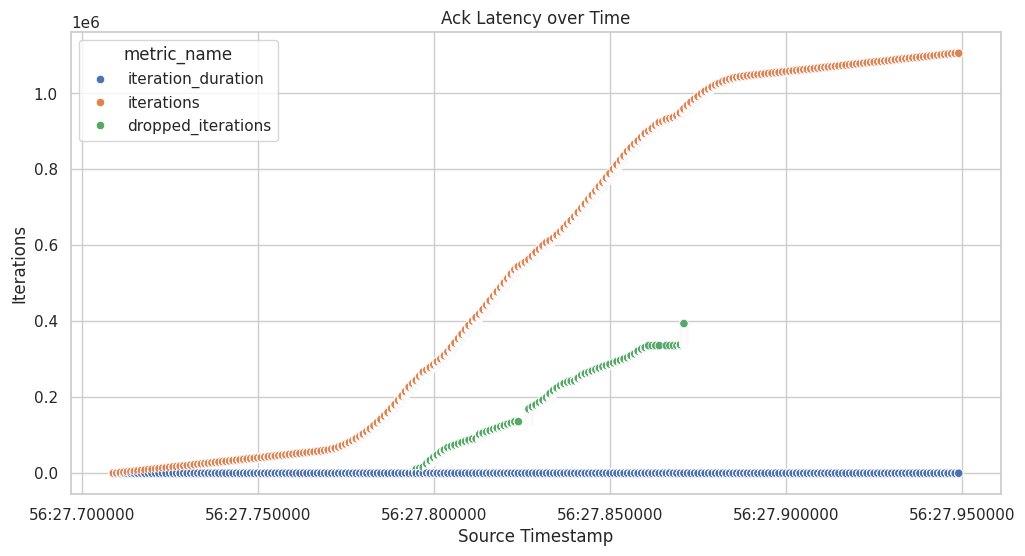

In [21]:
# Convert source_timestamp to datetime
try:
    iteractions = df[(df["metric_name"] == "iteration_duration") | (df["metric_name"] == "iterations") | (df["metric_name"] == "dropped_iterations")].copy()
    mask = iteractions["metric_name"].isin(["iterations", "dropped_iterations"])
    iteractions.loc[mask, "metric_value"] = iteractions[mask].groupby("metric_name")["metric_value"].cumsum()
    iteractions['timestamp_dt'] = pd.to_datetime(pd.to_numeric(iteractions['timestamp']), unit='ms')
except Exception as e:
    print(f"Could not parse timestamp: {e}")

plt.figure(figsize=(12, 6))
sns.scatterplot(data=iteractions, x="timestamp_dt", y="metric_value", hue="metric_name", legend=True)
plt.title("Ack Latency over Time")
plt.xlabel("Source Timestamp")
plt.ylabel("Iterations")
plt.show()